In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

In [13]:
df = pd.read_excel('filtered_data.xlsx')
df.head()

,Clostridium_XI_Otu12,Klebsiella_Otu4,Staphylococcus_Otu3,Escherichia/Shigella_Otu2,Enterococcus_Otu1,Streptococcus_Otu8,Sphingomonas_Otu5,Finegoldia_Otu9,Ruminococcaceae_unclassified_Otu11,Prevotella_Otu7,...,Finegoldia_Otu20269,Finegoldia_Otu20304,Finegoldia_Otu20307,Finegoldia_Otu20311,Finegoldia_Otu20314,Acinetobacter_Otu20318,Finegoldia_Otu20320,Country,Gender,Class
0,0.000000,0.000067,0.000,0.027667,0.0,0.001000,0.000067,0.061267,0.000000,0.016400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,2
1,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000933,0.000200,0.000000,0.000600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,2
2,0.000067,0.000000,0.000,0.001000,0.0,0.000067,0.000000,0.024000,0.000133,0.126333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
3,0.000000,0.000000,0.000,0.000000,0.0,0.000133,0.000000,0.047400,0.000067,0.001333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,2
4,0.000000,0.000000,0.001,0.000067,0.0,0.000000,0.000000,0.036467,0.000000,0.000067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,2


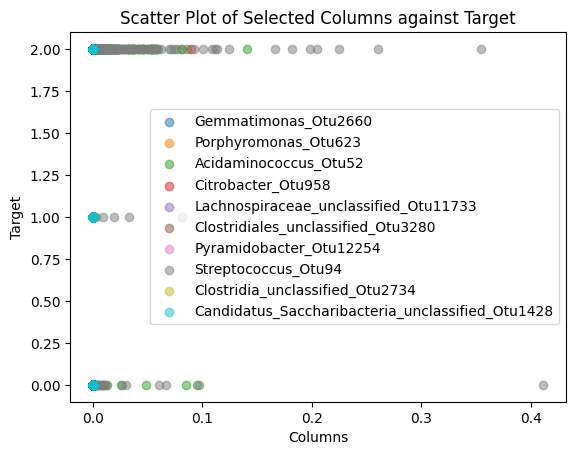

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a pandas DataFrame called 'df'
num_columns = df.shape[1]
selected_columns = random.sample(range(num_columns), int(num_columns * 0.5))
selected_data = df.iloc[:, selected_columns]
y = df['Class']
# Assuming your target variable is stored in a pandas Series called 'target'
fig, ax = plt.subplots()

# Randomly select a subset of columns to plot
subset_columns = random.sample(list(selected_data.columns), 10)

# Plot each selected column against the target variable
for col in subset_columns:
    ax.scatter(selected_data[col],y,alpha=0.5, label=col)

ax.legend()
plt.xlabel('Columns')
plt.ylabel('Target')
plt.title('Scatter Plot of Selected Columns against Target')
plt.show()

In [4]:

correlation_matrix = df.corr().abs()
threshold = 0.9

# Find and drop one column from each highly correlated pair
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)
df = df.drop(columns=to_drop)# Drop the identified columns
print("Dropped Columns:", to_drop)


Dropped Columns: {'Acetanaerobacterium_Otu1082', 'Lysinibacillus_Otu2667', 'Clostridiales_unclassified_Otu5039', 'Faecalibacterium_Otu12436', 'Akkermansia_Otu2053', 'Peptoniphilus_Otu16038', 'Planctomycetaceae_unclassified_Otu5681', 'Parabacteroides_Otu3811', 'Gp3_unclassified_Otu13578', 'Myxococcales_unclassified_Otu4359', 'Faecalibacterium_Otu6126', 'Chitinophagaceae_unclassified_Otu8999', 'Bacteroidales_unclassified_Otu1995', 'Adhaeribacter_Otu12500', 'Escherichia/Shigella_Otu16056', 'Enterococcaceae_unclassified_Otu18708', 'Escherichia/Shigella_Otu8857', 'Ruminococcaceae_unclassified_Otu7249', 'Pasteurellaceae_unclassified_Otu16507', 'Lachnospiraceae_unclassified_Otu16000', 'Succiniclasticum_Otu17665', 'Desulfovibrio_Otu1258', 'Burkholderiales_incertae_sedis_unclassified_Otu3350', 'Gammaproteobacteria_unclassified_Otu10988', 'Flavobacterium_Otu10788', 'Gemmatimonas_Otu1641', 'Clostridiales_unclassified_Otu13145', 'Peptoniphilus_Otu13659', 'Lachnospiraceae_unclassified_Otu543', 'Lac

In [5]:
df.head()

,Clostridium_XI_Otu12,Klebsiella_Otu4,Staphylococcus_Otu3,Escherichia/Shigella_Otu2,Enterococcus_Otu1,Streptococcus_Otu8,Sphingomonas_Otu5,Finegoldia_Otu9,Ruminococcaceae_unclassified_Otu11,Prevotella_Otu7,...,Finegoldia_Otu19100,Lachnospiraceae_unclassified_Otu19252,Prevotella_Otu19517,Bacteroides_Otu19527,Prevotella_Otu19579,Escherichia/Shigella_Otu20087,Streptococcaceae_unclassified_Otu20094,Country,Gender,Class
0,0.000000,0.000067,0.000,0.027667,0.0,0.001000,0.000067,0.061267,0.000000,0.016400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,2
1,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000933,0.000200,0.000000,0.000600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,2
2,0.000067,0.000000,0.000,0.001000,0.0,0.000067,0.000000,0.024000,0.000133,0.126333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
3,0.000000,0.000000,0.000,0.000000,0.0,0.000133,0.000000,0.047400,0.000067,0.001333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,2
4,0.000000,0.000000,0.001,0.000067,0.0,0.000000,0.000000,0.036467,0.000000,0.000067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,2


In [10]:
from sklearn.utils.class_weight import compute_class_weight

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class_labels = np.unique(y_train)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=class_labels, y=y_train)

# Create a dictionary of class weights
class_weight_dict = dict(zip(class_labels, class_weights))

# Print class weights
for class_label, weight in class_weight_dict.items():
    print(f"Weight of Class {class_label} = {weight}")


Weight of Class 0 = 3.98
Weight of Class 1 = 22.11111111111111
Weight of Class 2 = 0.36988847583643125


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, learning_curve, train_test_split, GridSearchCV

# Assuming 'df' is your DataFrame and 'target' is the name of your target column

param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Initialize GridSearchCV
# Initialize Logistic Regression with balanced class weights
logreg = LogisticRegression(class_weight=class_weight_dict, random_state=42)
# Initialize GridSearchCV
grid_search = GridSearchCV(logreg, param_grid_logreg, cv=stratified_kfold, scoring='f1_weighted')

accuracy_train_list = []
accuracy_test_list = []
precision_list = []
recall_list = []
f1_list = []
conf_matrices=[]
# Perform cross-validation with hyperparameter tuning
for train_index, test_index in stratified_kfold.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Fit logistic regression with hyperparameter tuning
    grid_search.fit(X_train_fold, y_train_fold)
    y_train_pred = grid_search.best_estimator_.predict(X_train_fold)
    y_test_pred = grid_search.best_estimator_.predict(X_test_fold)

   # Compute accuracy
    accuracy_train = accuracy_score(y_train_fold, y_train_pred)
    accuracy_test = accuracy_score(y_test_fold, y_test_pred)

    # Store metrics for each fold
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)
    precision_list.append(precision_score(y_test_fold, y_test_pred, average='weighted'))
    recall_list.append(recall_score(y_test_fold, y_test_pred, average='weighted'))
    f1_list.append(f1_score(y_test_fold, y_test_pred, average='weighted'))
    # Compute and store confusion matrix for each fold
    conf_matrices.append(confusion_matrix(y_test_fold, y_test_pred))



# Print average metrics across folds
print(f"Average Accuracy on Training Set: {np.mean(accuracy_train_list):.4f}")
print(f"Average Accuracy on Testing Set: {np.mean(accuracy_test_list):.4f}")
print(f"Average Precision: {np.mean(precision_list):.4f}")
print(f"Average Recall: {np.mean(recall_list):.4f}")
print(f"Average F1-Score: {np.mean(f1_list):.4f}")
# Optionally, print the classification report for the last fold
print(classification_report(y_test_fold, y_test_pred, zero_division=1))
# Aggregate and print confusion matrix across all folds
conf_matrix_total = np.sum(conf_matrices, axis=0)
print("\nConfusion Matrix (Aggregated Across Folds):")
print(conf_matrix_total)

# Print best hyperparameters from the grid search
print("\nBest Hyperparameters from Grid Search:")
print(grid_search.best_params_)





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Average Accuracy on Training Set: 0.7199
Average Accuracy on Testing Set: 0.5891
Average Precision: 0.8075
Average Recall: 0.5891
Average F1-Score: 0.6734
              precision    recall  f1-score   support

           0       0.08      0.23      0.12        13
           1       0.00      0.00      0.00         3
           2       0.88      0.63      0.74       133

    accuracy                           0.58       149
   macro avg       0.32      0.29      0.29       149
weighted avg       0.80      0.58      0.67       149


Confusion Matrix (Aggregated Across Folds):
[[ 16   6  42]
 [  4   1   9]
 [170  76 423]]

Best Hyperparameters from Grid Search:
{'C': 100, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, learning_curve, train_test_split, GridSearchCV

# Assuming 'df' is your DataFrame and 'target' is the name of your target column

class_weights = {0: 2, 1: 2, 2: 1}
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Initialize GridSearchCV
# Initialize Logistic Regression with balanced class weights
logreg = LogisticRegression(class_weight=class_weights, random_state=42)
# Initialize GridSearchCV
grid_search = GridSearchCV(logreg, param_grid_logreg, cv=stratified_kfold, scoring='f1_weighted')

accuracy_train_list = []
accuracy_test_list = []
precision_list = []
recall_list = []
f1_list = []
conf_matrices=[]
# Perform cross-validation with hyperparameter tuning
for train_index, test_index in stratified_kfold.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Fit logistic regression with hyperparameter tuning
    grid_search.fit(X_train_fold, y_train_fold)
    y_train_pred = grid_search.best_estimator_.predict(X_train_fold)
    y_test_pred = grid_search.best_estimator_.predict(X_test_fold)

   # Compute accuracy
    accuracy_train = accuracy_score(y_train_fold, y_train_pred)
    accuracy_test = accuracy_score(y_test_fold, y_test_pred)

    # Store metrics for each fold
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)
    precision_list.append(precision_score(y_test_fold, y_test_pred, average='weighted'))
    recall_list.append(recall_score(y_test_fold, y_test_pred, average='weighted'))
    f1_list.append(f1_score(y_test_fold, y_test_pred, average='weighted'))
    # Compute and store confusion matrix for each fold
    conf_matrices.append(confusion_matrix(y_test_fold, y_test_pred))



# Print average metrics across folds
print(f"Average Accuracy on Training Set: {np.mean(accuracy_train_list):.4f}")
print(f"Average Accuracy on Testing Set: {np.mean(accuracy_test_list):.4f}")
print(f"Average Precision: {np.mean(precision_list):.4f}")
print(f"Average Recall: {np.mean(recall_list):.4f}")
print(f"Average F1-Score: {np.mean(f1_list):.4f}")
# Optionally, print the classification report for the last fold
print(classification_report(y_test_fold, y_test_pred, zero_division=1))
# Aggregate and print confusion matrix across all folds
conf_matrix_total = np.sum(conf_matrices, axis=0)
print("\nConfusion Matrix (Aggregated Across Folds):")
print(conf_matrix_total)

# Print best hyperparameters from the grid search
print("\nBest Hyperparameters from Grid Search:")
print(grid_search.best_params_)





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Average Accuracy on Training Set: 0.8956
Average Accuracy on Testing Set: 0.8956
Average Precision: 0.8021
Average Recall: 0.8956
Average F1-Score: 0.8463
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        13
           1       1.00      0.00      0.00         3
           2       0.89      1.00      0.94       133

    accuracy                           0.89       149
   macro avg       0.96      0.33      0.31       149
weighted avg       0.90      0.89      0.84       149


Confusion Matrix (Aggregated Across Folds):
[[  0   0  64]
 [  0   0  14]
 [  0   0 669]]

Best Hyperparameters from Grid Search:
{'C': 0.001, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
logreg.fit(X_train, y_train)
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Compute accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy on Training Set: {accuracy_train:.4f}")
print(f"Accuracy on Testing Set: {accuracy_test:.4f}")


Accuracy on Training Set: 0.9012
Accuracy on Testing Set: 0.8733


In [31]:
# Perform cross-validation
cv_accuracy = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
# Print average accuracy across folds
print("Average Accuracy: {:.4f}".format(np.mean(cv_accuracy)))

Average Accuracy: 0.8943


In [32]:
print(classification_report(y_test, y_test_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        14
           1       1.00      0.00      0.00         5
           2       0.87      1.00      0.93       131

    accuracy                           0.87       150
   macro avg       0.96      0.33      0.31       150
weighted avg       0.89      0.87      0.81       150





1.   Precision:

*   Precision for class 0: 1.00 (All predictions for class 0 were correct)
*   Precision for class 1: 1.00 (All predictions for class 1 were correct)
*   Precision for class 2: 0.87 (87% of predictions for class 2 were correct)


2.   Recall (Sensitivity):

*   Recall for class 0: 0.00 (The model captured none of the actual instances of class 0)

*   Recall for class 1: 0.00 (The model captured none of the actual instances of class 1)

*   Recall for class 2: 1.00 (The model captured all actual instances of class 2)

1.   F1-score:

*  F1-score is the harmonic mean of precision and recall.

*  F1-score for class 0: 0.00  it suggests that the model's predictions for class 0 lack a good balance between precision and recall
*   F1-score for class 1: 0.00 (same as class 0)

*  F1-score for class 2: 0.93


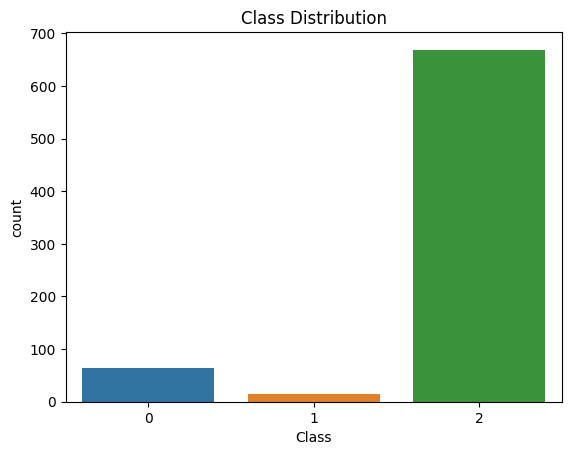

In [39]:
import seaborn as sns

sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()


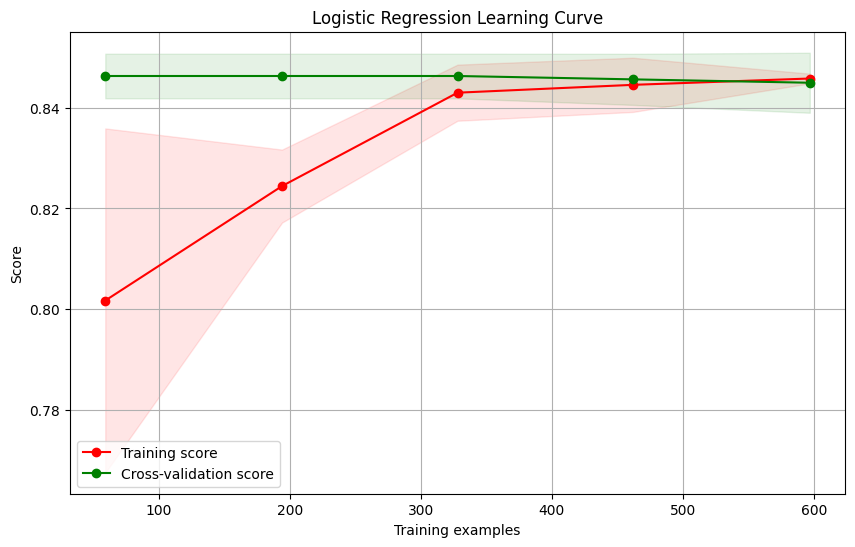

In [22]:
# Create a function to plot learning curves
def plot_learning_curve(estimator, X, y, title="Learning Curve", ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times=True, scoring='f1_weighted'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")

    return plt

# Plot learning curves
plot_learning_curve(logreg, X, y, cv=stratified_kfold, title="Logistic Regression Learning Curve")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


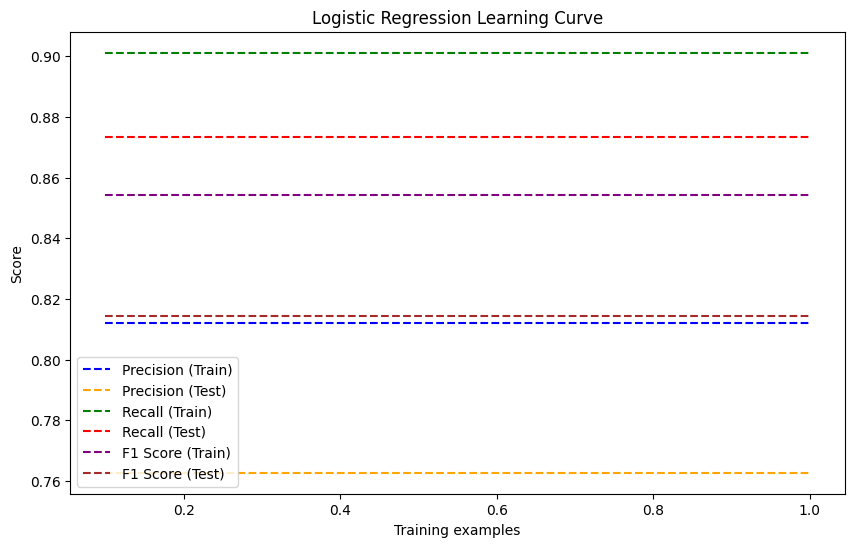

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, learning_curve, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Function to plot learning curves and additional metrics
def plot_learning_curve_and_metrics(estimator, X_train, y_train, X_test, y_test, title="Learning Curve", ylim=None, cv=None,
                                    n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

     # Additional metrics
    precision_train = precision_score(y_train, estimator.predict(X_train), average='weighted')
    precision_test = precision_score(y_test, estimator.predict(X_test), average='weighted')

    recall_train = recall_score(y_train, estimator.predict(X_train), average='weighted')
    recall_test = recall_score(y_test, estimator.predict(X_test), average='weighted')

    f1_train = f1_score(y_train, estimator.predict(X_train), average='weighted')
    f1_test = f1_score(y_test, estimator.predict(X_test), average='weighted')

    #auc_roc_train = roc_auc_score(pd.get_dummies(y_train), pd.get_dummies(estimator.predict(X_train)), average='weighted')
    #auc_roc_test = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(estimator.predict(X_test)), average='weighted')

    # Plot learning curve and additional metrics
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Plot additional metrics
    plt.plot(train_sizes, [precision_train] * len(train_sizes), '--', color="b", label="Precision (Train)")
    plt.plot(train_sizes, [precision_test] * len(train_sizes), '--', color="orange", label="Precision (Test)")

    plt.plot(train_sizes, [recall_train] * len(train_sizes), '--', color="g", label="Recall (Train)")
    plt.plot(train_sizes, [recall_test] * len(train_sizes), '--', color="red", label="Recall (Test)")

    plt.plot(train_sizes, [f1_train] * len(train_sizes), '--', color="purple", label="F1 Score (Train)")
    plt.plot(train_sizes, [f1_test] * len(train_sizes), '--', color="brown", label="F1 Score (Test)")

    plt.legend(loc="best")

    return plt

# Use the best estimator from grid search for evaluation
best_estimator = grid_search.best_estimator_

# Convert target values to integers for proper indexing
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

# Plot learning curves and additional metrics with the best estimator
plot_learning_curve_and_metrics(best_estimator, X_train, y_train_int, X_test, y_test_int, title="Logistic Regression Learning Curve")
plt.show()


Precision deffrent from classification report as The class distribution in dataset might be imbalanced, leading to differences in precision scores. The average precision in the classification report considers the entire dataset, while the learning curve precision focuses on subsets of the data. If a class is imbalanced, it can affect precision scores.

Top 10 Important Features:
                   Feature  Coefficient
29           Blautia_Otu30     1.138539
21        Prevotella_Otu24     0.804812
4        Enterococcus_Otu1     0.697918
24     Campylobacter_Otu25    -0.621494
16   Faecalibacterium_Otu6     0.590066
106    Streptococcus_Otu94     0.535793
12       Bacteroides_Otu13    -0.509215
61     Porphyromonas_Otu56    -0.504061
6        Sphingomonas_Otu5    -0.460622
67        Prevotella_Otu55    -0.413821


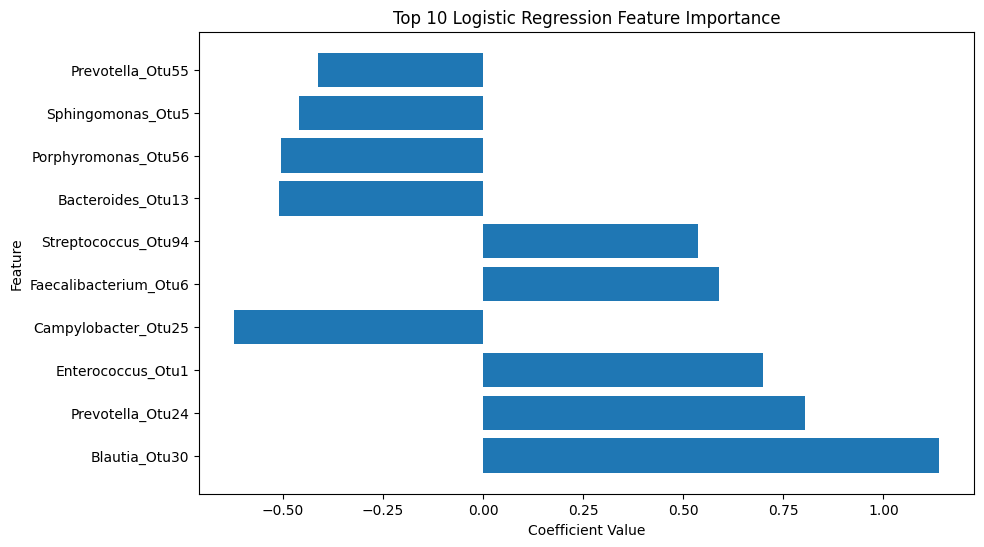

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assuming you have a fitted logistic regression model named 'logreg'
# You may need to replace 'logreg' with the actual name of your model

# Extract feature coefficients from the logistic regression model
feature_coefficients = logreg.coef_[0]

# Create a DataFrame to store feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': feature_coefficients})

# Sort the DataFrame by the absolute value of the coefficients in descending order
feature_importance_df['AbsoluteCoefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='AbsoluteCoefficient', ascending=False)

# Select the top 10 features
top_10_features = feature_importance_df.head(10)

# Print the top 10 features and their coefficients
print("Top 10 Important Features:")
print(top_10_features[['Feature', 'Coefficient']])

# Plot the feature importance for the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_10_features)), top_10_features['Coefficient'], align='center')
plt.yticks(range(len(top_10_features)), top_10_features['Feature'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Logistic Regression Feature Importance')
plt.show()


Positive Impact:

The feature "Blautia_Otu30" has the highest positive impact, with a coefficient of approximately 1.14. As the values of this feature increase, As a result, the model predicts a higher probability of the target class.
Other Positive Impacts:

Features like "Prevotella_Otu24" and "Enterococcus_Otu1" also have positive impacts, though not as strong as "Blautia_Otu30."

Negative Impact:

The feature "Campylobacter_Otu25" has the highest negative impact, with a coefficient of approximately -0.62. As a result, the model predicts a lower probability of the target class.
Other Negative Impacts:

Features like "Bacteroides_Otu13," "Porphyromonas_Otu56," "Sphingomonas_Otu5," and "Prevotella_Otu55" also have negative impacts, though not as strong as "Campylobacter_Otu25."